# Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
%matplotlib inline

# Loading Data

In [2]:
df = pd.read_csv('data.csv')

# take a look at the dataset
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Data Exploration

In [3]:
# summarize the data
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


## Trim whitespace from ends of each value across all series in datafram

In [4]:
def trim_all_columns(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

## Clear Data
Clear and Prepre Data

In [5]:
df = trim_all_columns(df)

df = df[~df['Address'].isnull()].reset_index(drop=True)

df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df = df[df['Area'] <= 500].reset_index(drop=True)

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df[df['Price'] <= 6.000000e+10].reset_index(drop=True)

le = LabelEncoder()
df['Parking'] = le.fit_transform(df['Parking'])
df['Warehouse'] = le.fit_transform(df['Warehouse'])
df['Elevator'] = le.fit_transform(df['Elevator'])

df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3.426000e+03,3.426000e+03
mean,103.433742,2.070053,0.847052,0.915061,0.790426,5.066115e+09,1.688705e+05
std,54.064729,0.742689,0.359990,0.278831,0.407064,6.654874e+09,2.218291e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,68.000000,2.000000,1.000000,1.000000,1.000000,1.400000e+09,4.666667e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.850000e+09,9.500000e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,500.000000,5.000000,1.000000,1.000000,1.000000,5.750000e+10,1.916667e+06


## Prepre Address	
The neighborhood name is replaced by the average price per meter in the area

In [6]:
location = dict()
location_Count = dict()
for i in range(0, len(df)):
    location[df['Address'][i]] = int(location.get(df['Address'][i] , 0)) + (int(df['Price'][i] / df['Area'][i]))
    location_Count[df['Address'][i]] = int(location_Count.get(df['Address'][i] , 0)) + 1
    
for i in range(0, len(df)):
    df['Address'][i] = int(int(location.get(df['Address'][i] , 0)) / int(location_Count.get(df['Address'][i] , 0))) 

#df.describe()

C:\Users\B_Ameri\AppData\Local\Temp\ipykernel_21720\3832093707.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Address'][i] = int(int(location.get(df['Address'][i] , 0)) / int(location_Count.get(df['Address'][i] , 0)))


### Let's select some features to explore more.

In [7]:
cdf = df[['Area', 'Parking', 'Elevator', 'Address', 'Price']]
cdf.head(9)

,Area,Parking,Elevator,Address,Price
0,63.0,1,1,36368050,1.850000e+09
1,60.0,1,1,36368050,1.850000e+09
2,79.0,1,1,7900049,5.500000e+08
3,95.0,1,1,9818187,9.025000e+08
4,123.0,1,1,83190345,7.000000e+09
5,70.0,1,0,44672029,2.050000e+09
6,87.0,1,1,7900049,6.000000e+08
7,59.0,1,1,36368050,2.150000e+09
8,54.0,1,0,13928946,4.930000e+08


We can plot each of these features:

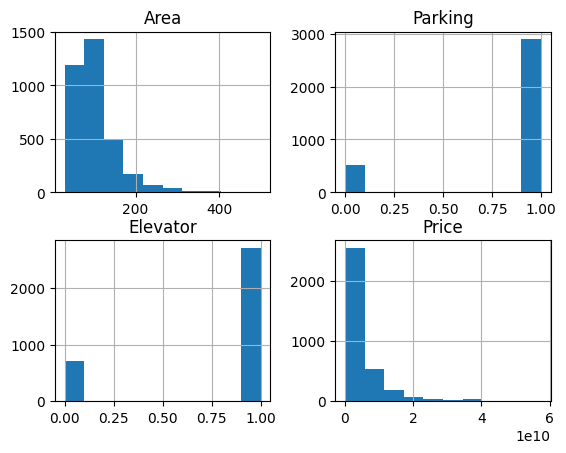

In [8]:
viz = cdf
viz.hist()
plt.show()

Now, let's plot each of these features against the Area, to see how linear their relationship is:

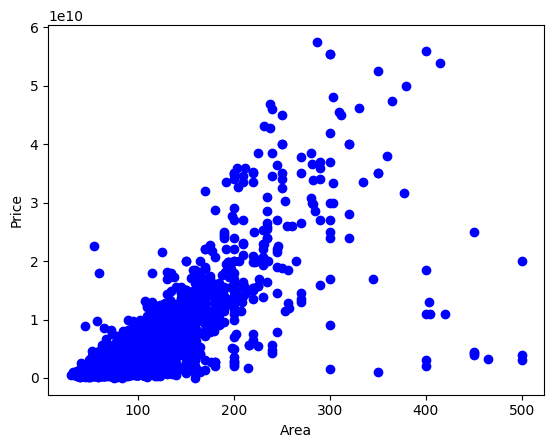

In [9]:
plt.scatter(cdf.Area, cdf.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

Now, let's plot each of these features against the Address, to see how linear their relationship is:

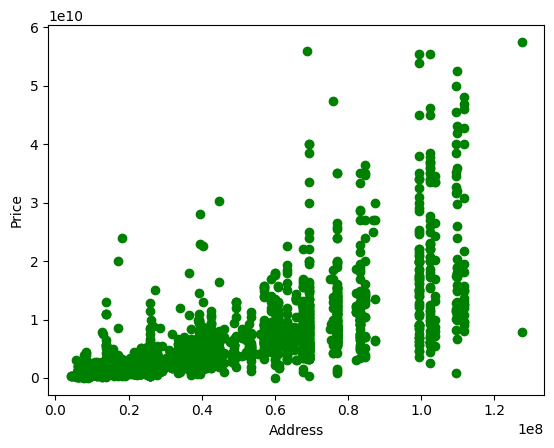

In [10]:
plt.scatter(cdf.Address, cdf.Price,  color='g')
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

Creating train and test dataset

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value that using linear approximation.

### Train,Test data distribution

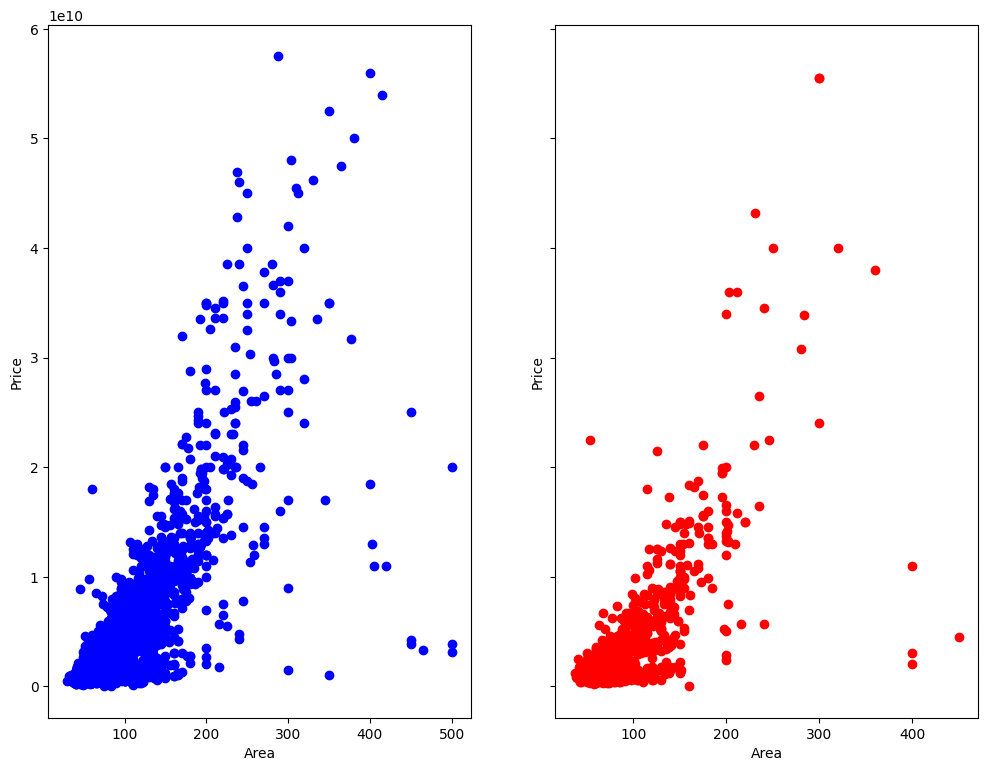

In [12]:
fig, axs = plt.subplots(1,2,figsize=(12,9), sharey='row')
ax1,ax2 = axs

ax1.scatter(train.Area, train.Price,  color='blue')
ax1.set_xlabel("Area")
ax1.set_ylabel("Price")

ax2.scatter(test.Area, test.Price,  color='red')
ax2.set_xlabel("Area")
ax2.set_ylabel("Price")

plt.show()

### Simple Linear Regression (Area)

Variance score: 0.50


C:\Users\B_Ameri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Price')

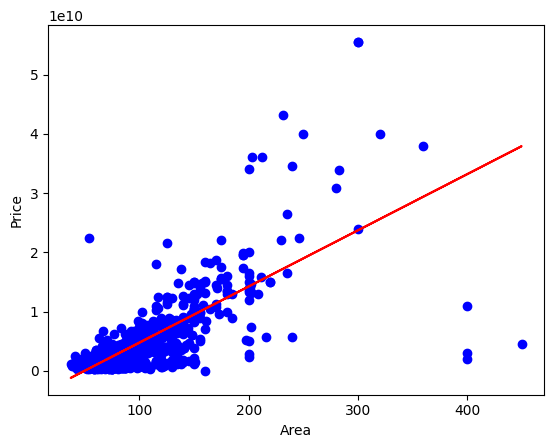

In [13]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
y_= regr.predict(test[['Area']])
x = np.asanyarray(test[['Area']])
y = np.asanyarray(test[['Price']])
print('Variance score: %.2f' % regr.score(x, y))
plt.scatter(x, y,  color='blue')
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.xlabel("Area")
plt.ylabel("Price")

### Simple Linear Regression (Address)

Variance score: 0.54


C:\Users\B_Ameri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Text(0, 0.5, 'Price')

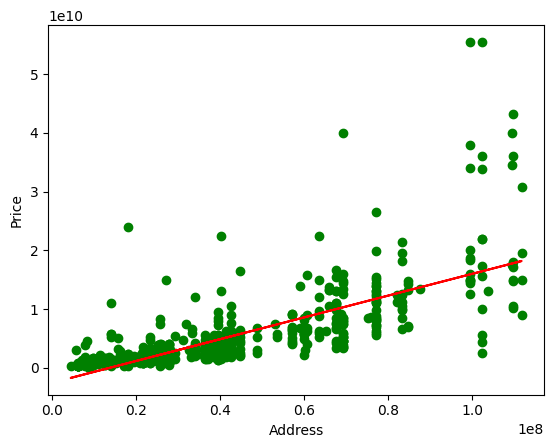

In [14]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Address']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
y_= regr.predict(test[['Address']])
x = np.asanyarray(test[['Address']])
y = np.asanyarray(test[['Price']])
print('Variance score: %.2f' % regr.score(x, y))
plt.scatter(x, y,  color='g')
plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
plt.xlabel("Address")
plt.ylabel("Price")

### Multiple Regression Model and Practice

(Area, Parking, Address)

In [15]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area', 'Parking', 'Address']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
y_= regr.predict(test[['Area', 'Parking', 'Address']])
x = np.asanyarray(test[['Area', 'Parking', 'Address']])
y = np.asanyarray(test[['Price']])
print('Variance score: %.2f' % regr.score(x, y))

Variance score: 0.73


C:\Users\B_Ameri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Multiple Regression Model and Practice

(Area, Parking, Elevator, Address)

In [16]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area', 'Parking', 'Elevator', 'Address']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
y_= regr.predict(test[['Area', 'Parking', 'Elevator', 'Address']])
x = np.asanyarray(test[['Area', 'Parking', 'Elevator', 'Address']])
y = np.asanyarray(test[['Price']])
print('Variance score: %.2f' % regr.score(x, y))

Variance score: 0.73


C:\Users\B_Ameri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Results:

After 10 times:

Best Simple Linear Regression (Area) : 0.63

Best Simple Linear Regression (Address) :0.52

Best Multiple Regression Model (Area, Parking, Address): 0.74

Best Multiple Regression Model (Area, Parking, Elevator, Address): 0.79